<a href="https://colab.research.google.com/github/codefluorite/tensorflow/blob/main/tensorflow_module2_neutalnetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


# Import the dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

To look at one pixel

In [5]:
type(train_images) # to look at the type of dataset

numpy.ndarray

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

195 represents the grey colour value

In [6]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

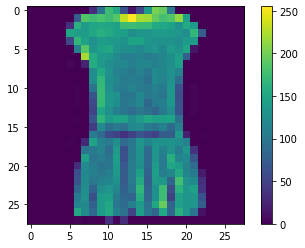

In [9]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

# Preprocessing the data

It is important to process all the values between -1 and 1. This is to make the weight values and actual values small enough for processing.

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building the model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

# Compiling and training the model

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [14]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5015 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3783 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3134 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

# Evaluate the model

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3376 - accuracy: 0.8808
Test accuracy: 0.8808000087738037


Evaluating the data which is overfitting the model. 

In [16]:
model.fit(train_images, train_labels, epochs=8) 

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2315 - accuracy: 0.9132
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2252 - accuracy: 0.9157
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2181 - accuracy: 0.9181
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2108 - accuracy: 0.9208
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2053 - accuracy: 0.9227
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1990 - accuracy: 0.9257
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1940 - accuracy: 0.9271
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1898 - accuracy: 0.9298


# Make predictions

In [18]:
predictions = model.predict(test_images)

In [19]:
print(predictions)

[[2.4749987e-11 3.5682766e-11 9.6539140e-12 ... 7.4205064e-04
  1.7274905e-12 9.9777204e-01]
 [1.2727983e-04 3.2580155e-15 9.9329376e-01 ... 1.7483125e-23
  4.4963192e-13 1.8782980e-18]
 [2.2295533e-12 1.0000000e+00 1.1486852e-16 ... 5.3237791e-31
  2.1420019e-24 5.6751184e-23]
 ...
 [4.5830749e-08 1.8987251e-12 6.2612454e-10 ... 2.9065356e-16
  9.9999917e-01 1.0630362e-16]
 [9.2055343e-11 1.0000000e+00 2.6732642e-13 ... 1.6052236e-22
  2.7889396e-15 3.7790133e-17]
 [4.0097925e-07 1.0094783e-09 6.3102385e-07 ... 1.3171361e-06
  5.1783547e-07 3.0997893e-09]]


# Verify predictions

Pick a number: 34


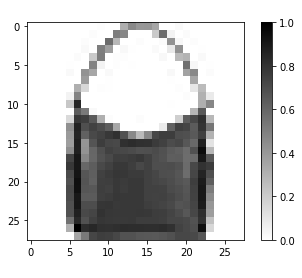

In [23]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
